In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [48]:
df = pd.read_csv("Uber_Customer_Support_Tickets_Cleaned.csv")


In [49]:
# description
print("Shape of dataset:", df.shape)
print("Columns:", df.columns)
print(df.head())  

Shape of dataset: (1000, 8)
Columns: Index(['Ticket_ID', 'Created_At', 'Channel', 'Response_Time_Minutes',
       'Resolution_Time_Minutes', 'CSAT_Score', 'Issue_Type',
       'Daily_Ticket_Count'],
      dtype='object')
  Ticket_ID  Created_At     Channel  Response_Time_Minutes  \
0     T0001  2025-02-21  Live Agent                    4.0   
1     T0002  2025-01-15  Live Agent                    7.0   
2     T0003  2025-03-13  Live Agent                    8.0   
3     T0004  2025-03-02  Live Agent                   17.0   
4     T0005  2025-01-21     Chatbot                    5.0   

   Resolution_Time_Minutes  CSAT_Score         Issue_Type  Daily_Ticket_Count  
0                      175         3.0  Ride Cancellation                  13  
1                       15         4.0          Lost Item                  11  
2                      162         4.0     Account Access                   9  
3                      154         2.0          Lost Item                  12  
4     

##Univariate EDA##

In [6]:
#CSAT 

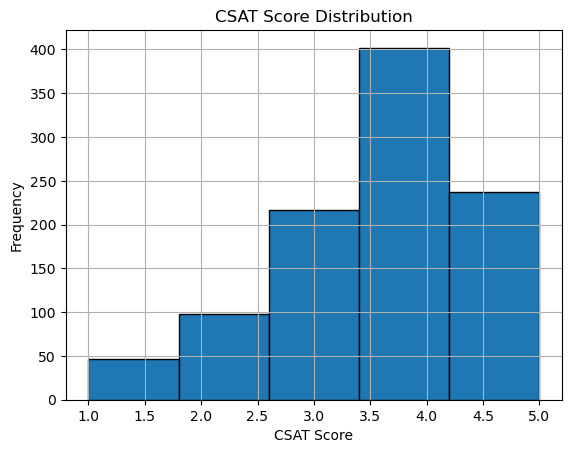

In [50]:
df["CSAT_Score"].hist(bins=5, edgecolor="black")
plt.title("CSAT Score Distribution")
plt.xlabel("CSAT Score")
plt.ylabel("Frequency")
plt.show()

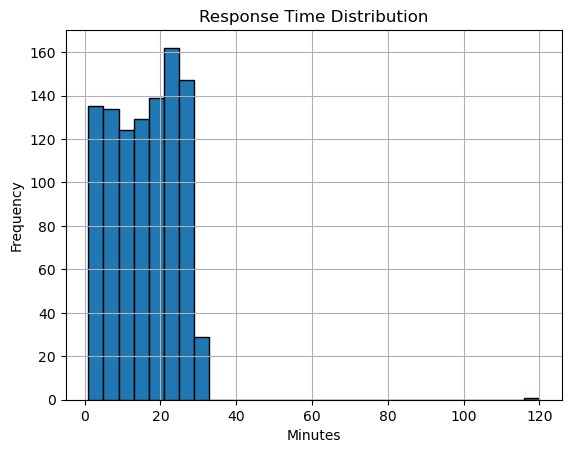

In [51]:
# Response Time
df["Response_Time_Minutes"].hist(bins=30, edgecolor="black")
plt.title("Response Time Distribution")
plt.xlabel("Minutes")
plt.ylabel("Frequency")
plt.show()

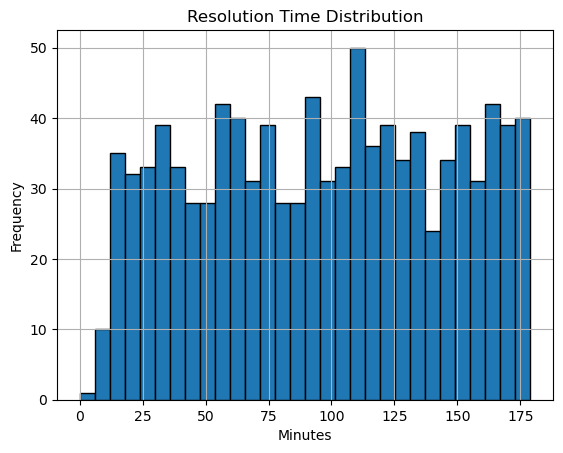

In [52]:
# Resolution Time
df["Resolution_Time_Minutes"].hist(bins=30, edgecolor="black")
plt.title("Resolution Time Distribution")
plt.xlabel("Minutes")
plt.ylabel("Frequency")
plt.show()

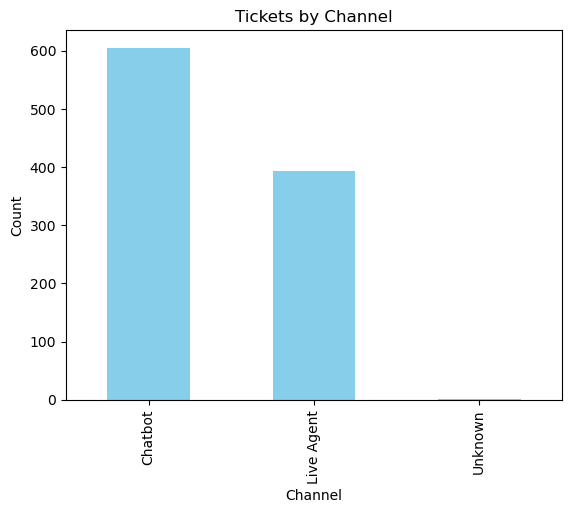

In [53]:
# Tickets by Channel
df["Channel"].value_counts().plot(kind="bar", color="skyblue")
plt.title("Tickets by Channel")
plt.xlabel("Channel")
plt.ylabel("Count")
plt.show()

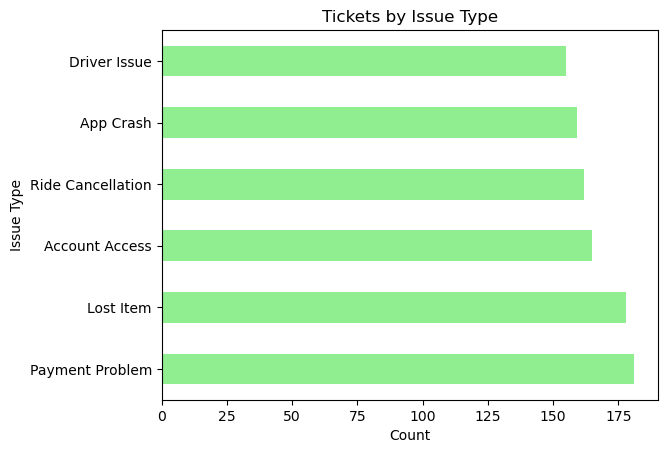

In [54]:
# Tickets by Issue Type
df["Issue_Type"].value_counts().plot(kind="barh", color="lightgreen")
plt.title("Tickets by Issue Type")
plt.xlabel("Count")
plt.ylabel("Issue Type")
plt.show()

##BIVARIATE EDA##

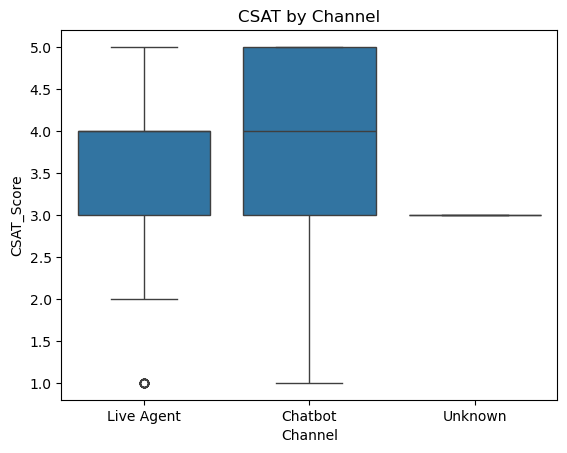

In [55]:
# CSAT vs Channel
sns.boxplot(x="Channel", y="CSAT_Score", data=df)
plt.title("CSAT by Channel")
plt.show()

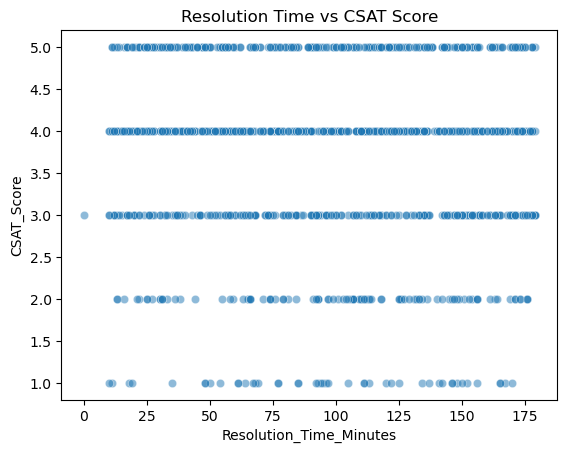

In [56]:
# Resolution Time vs CSAT
sns.scatterplot(x="Resolution_Time_Minutes", y="CSAT_Score", data=df, alpha=0.5)
plt.title("Resolution Time vs CSAT Score")
plt.show()

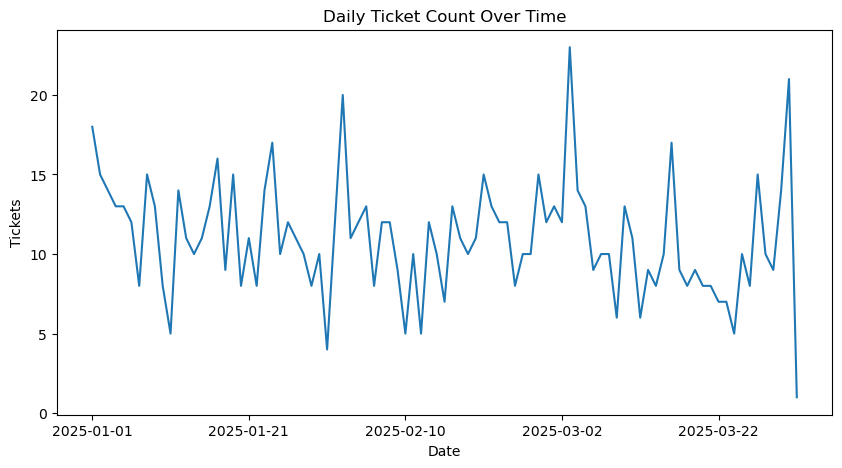

In [57]:
# Daily Ticket Trend
daily_counts = df.groupby("Created_At").size()
daily_counts.plot(figsize=(10,5))
plt.title("Daily Ticket Count Over Time")
plt.xlabel("Date")
plt.ylabel("Tickets")
plt.show()

##OUTLIERS##

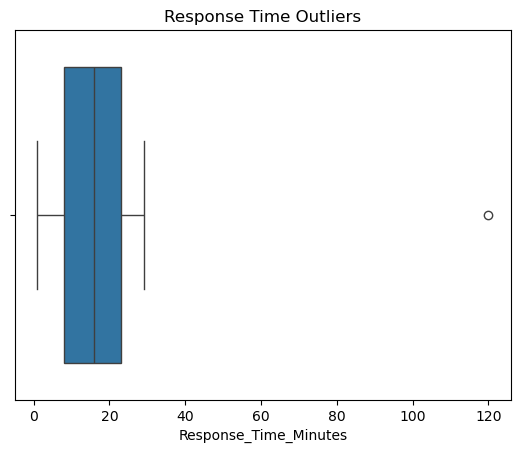

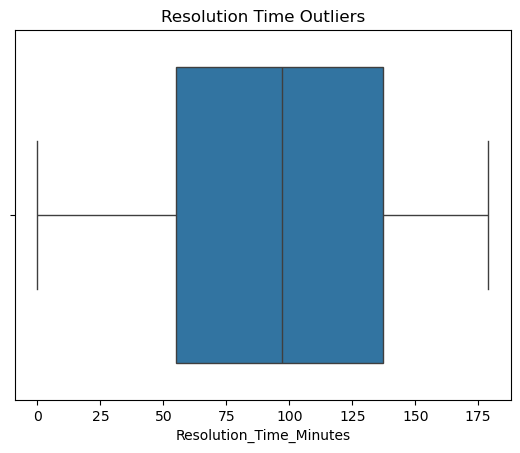

In [58]:
sns.boxplot(x=df["Response_Time_Minutes"])
plt.title("Response Time Outliers")
plt.show()

sns.boxplot(x=df["Resolution_Time_Minutes"])
plt.title("Resolution Time Outliers")
plt.show()

##PERFORMING FEATURE ENGINEERING (ADDING NEW USEFUL COLS)

In [59]:
# Time-based
df["Created_At"] = pd.to_datetime(df["Created_At"], errors="coerce")
print(df["Created_At"].dtype)

datetime64[ns]


In [60]:
df = df.dropna(subset=["Created_At"])

In [61]:
df["Day"] = df["Created_At"].dt.day
df["Month"] = df["Created_At"].dt.month
df["Weekday"] = df["Created_At"].dt.day_name()


In [62]:
#Daily ticket counts (calculating again and dropping the old col)
daily_counts = df.groupby("Created_At").size().reset_index(name="Daily_Ticket_Count")
df = df.merge(daily_counts, on="Created_At", how="left")
# drop old
df = df.drop(columns=["Daily_Ticket_Count_x"])
df = df.rename(columns={"Daily_Ticket_Count_y": "Daily_Ticket_Count"})


In [63]:
# Encode categories
encoder = LabelEncoder()
df["Channel_Code"] = encoder.fit_transform(df["Channel"].astype(str))
df["Issue_Code"] = encoder.fit_transform(df["Issue_Type"].astype(str))

In [64]:
# Resolution speed categories
df["Resolution_Category"] = pd.cut(
    df["Resolution_Time_Minutes"],
    bins=[0, 30, 60, 200],
    labels=["Fast", "Medium", "Slow"]
)

In [65]:
# Binary CSAT (1 = Happy customer, 0 = Unhappy customer)
df["CSAT_Binary"] = (df["CSAT_Score"] >= 4).astype(int)

In [66]:
print("\nEngineered dataset preview:")
print(df.head())


Engineered dataset preview:
  Ticket_ID Created_At     Channel  Response_Time_Minutes  \
0     T0001 2025-02-21  Live Agent                    4.0   
1     T0002 2025-01-15  Live Agent                    7.0   
2     T0003 2025-03-13  Live Agent                    8.0   
3     T0004 2025-03-02  Live Agent                   17.0   
4     T0005 2025-01-21     Chatbot                    5.0   

   Resolution_Time_Minutes  CSAT_Score         Issue_Type  Day  Month  \
0                      175         3.0  Ride Cancellation   21      2   
1                       15         4.0          Lost Item   15      1   
2                      162         4.0     Account Access   13      3   
3                      154         2.0          Lost Item    2      3   
4                       70         5.0          Lost Item   21      1   

     Weekday  Daily_Ticket_Count  Channel_Code  Issue_Code  \
0     Friday                  13             1           5   
1  Wednesday                  11         

##SAVING PREPARED DATASET

In [67]:
df.to_csv("Uber_Customer_Support_Tickets_Prepared.csv", index=False)
print("Prepared dataset saved as Uber_Customer_Support_Tickets_Prepare.csv")

Prepared dataset saved as Uber_Customer_Support_Tickets_Prepare.csv
